In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU
from os.path import join
from os import environ

In [2]:
Autoencoder = tf.keras.models.load_model('k_fold_best_model_new_architecture_test3')

In [3]:
home=environ['HOME']
folder1='GRIMech_CH4_models_RS3_15_trajectories'
folder2='Datasets'

cantera_species=pd.read_csv(join(home, folder1,folder2,'State_space_cte_pressure_T1418_st-quarter_phi_3.csv'))
cantera_species=pd.DataFrame(cantera_species)

cantera_sources=pd.read_csv(join(home,folder1,folder2,'Reaction_rates_cte_pressure_T1418_st-quarter_phi_3.csv'))
cantera_sources=pd.DataFrame(cantera_sources)

maximum_values=pd.read_csv(join(home,folder1,folder2,'maximum_values_T1418.csv'))
maximum_values=pd.DataFrame(maximum_values)

In [4]:
def hydrogen_data_clean_shift_grimech_cantera(cantera_species,cantera_sources,maximum_values):
    cantera_sources=cantera_sources.add_suffix('w')
    cantera_sources=cantera_sources.iloc[:,1:] #for taking out the timestep as data 
    
    cantera_time=cantera_species.iloc[:,1]
    cantera_temperature=cantera_species.iloc[:,2]
    cantera_pressure=cantera_species.iloc[:,3]
    
    cantera_species_fractions=cantera_species.iloc[:,4:]
    print(np.shape(cantera_species_fractions))
    
    cantera_species_fractions=cantera_species_fractions.loc[:,(cantera_species!=0).any(axis=0)]
    cantera_species_fractions=cantera_species_fractions.loc[:, (cantera_species != cantera_species.iloc[0]).any()]
    print(np.shape(cantera_species_fractions))
    
    n_columns_mass_fraction=np.shape(cantera_species_fractions)[1]
    print(n_columns_mass_fraction)
    
    cantera_sources=cantera_sources.loc[:,(cantera_sources!=0).any(axis=0)]
    cantera_sources=cantera_sources.loc[:, (cantera_sources != cantera_sources.iloc[0]).any()]
    
    print(np.shape(cantera_sources))
    n_columns_source=np.shape(cantera_sources)[1]
    print(n_columns_source)
    
    cantera_data=pd.concat([cantera_time, cantera_temperature,cantera_species_fractions,cantera_sources],axis=1)

    maximum_values=maximum_values.iloc[:,1:]
    maximum_values=pd.concat([maximum_values.iloc[:,0:2],maximum_values.iloc[:,3:]],axis=1)
    #print(maximum_values)
    
    maximum_values=maximum_values.to_numpy()
    #print(np.shape(maximum_values))
    
    iterations=np.shape(cantera_data)[1]
    
    #cantera_data.divide(maximum_values)
    for j in range(iterations):
        cantera_data.iloc[:,j]=cantera_data.iloc[:,j]/(maximum_values[0,j])
        #print(maximum_values[0,j])
    
    cantera_data_shift=cantera_data.loc[1:,:]
    cantera_data_shift=cantera_data_shift.add_suffix('shift')
    
    cantera_data=cantera_data.reset_index()
    cantera_data_shift=cantera_data_shift.reset_index()
    
    cantera_data=cantera_data.iloc[:,1:]
    cantera_data_shift=cantera_data_shift.iloc[:,1:]

    cantera_data=cantera_data.iloc[0:(np.shape(cantera_data_shift)[0]),:]
    
    data_all=pd.concat([cantera_data, cantera_data_shift], axis=1)

    columns=data_all.columns.to_list()
    
    return data_all, n_columns_source, n_columns_mass_fraction, columns

In [5]:
dataset, n_columns_source, n_columns_mass_fraction, columns=hydrogen_data_clean_shift_grimech_cantera(cantera_species,cantera_sources,maximum_values)

(120000, 49)
(120000, 30)
30
(120000, 30)
30


In [6]:
dataset

,t[s],T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,...,CH3OHwshift,C2Hwshift,C2H2wshift,C2H3wshift,C2H4wshift,C2H5wshift,C2H6wshift,HCCOwshift,CH2COwshift,HCCOHwshift
0,0.000008,0.405009,1.326108e-11,9.541461e-10,2.858210e-11,0.936511,1.600835e-11,1.734509e-13,9.651868e-07,7.981306e-10,...,1.925822e-09,4.537490e-28,6.483622e-17,7.682575e-18,2.165883e-08,7.989509e-06,-6.111756e-04,3.673155e-27,2.404399e-27,1.486555e-28
1,0.000017,0.405009,5.160087e-11,1.829151e-09,1.092913e-10,0.936511,6.208469e-11,1.282274e-12,1.930629e-06,3.190466e-09,...,4.175189e-09,2.356644e-27,1.465831e-16,2.288543e-17,3.273380e-08,8.112404e-06,-6.113001e-04,2.601521e-26,1.663305e-26,1.081551e-27
2,0.000025,0.405009,1.129863e-10,2.631809e-09,2.351217e-10,0.936511,1.354280e-10,4.166864e-12,2.896337e-06,7.176265e-09,...,7.154165e-09,7.453729e-27,2.618986e-16,4.943198e-17,4.398005e-08,8.238497e-06,-6.114271e-04,1.032914e-25,6.662611e-26,4.415418e-27
3,0.000033,0.405009,1.954994e-10,3.368527e-09,3.996552e-10,0.936511,2.333332e-10,9.609355e-12,3.862318e-06,1.275435e-08,...,1.077962e-08,1.833664e-26,4.113100e-16,8.941213e-17,5.540128e-08,8.366688e-06,-6.115561e-04,2.983396e-25,1.954920e-25,1.308870e-26
4,0.000042,0.405009,2.973953e-10,4.045134e-09,5.972098e-10,0.936511,3.532908e-10,1.831248e-11,4.828580e-06,1.992355e-08,...,1.497878e-08,3.774978e-26,5.953532e-16,1.444341e-16,6.699975e-08,8.496019e-06,-6.116867e-04,7.033436e-25,4.704137e-25,3.166254e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119994,0.999958,0.955486,2.682846e-01,4.433527e-01,9.971928e-01,0.278427,9.664355e-01,7.181703e-01,6.468984e-02,4.413328e-02,...,-7.349763e-22,-7.393404e-24,-1.080033e-24,-1.048753e-27,-2.446680e-29,-1.190828e-31,-7.768589e-34,-2.843146e-22,-4.997883e-23,-4.631364e-24
119995,0.999967,0.955486,2.682846e-01,4.433527e-01,9.971928e-01,0.278427,9.664355e-01,7.181703e-01,6.468984e-02,4.413328e-02,...,-8.256333e-22,-6.194359e-24,-1.100148e-24,-1.030183e-27,-2.537041e-29,-1.222322e-31,-6.863790e-34,-2.594692e-22,-4.902717e-23,-4.542862e-24
119996,0.999975,0.955486,2.682846e-01,4.433527e-01,9.971928e-01,0.278427,9.664355e-01,7.181703e-01,6.468984e-02,4.413328e-02,...,-7.892226e-22,-6.395232e-24,-1.078530e-24,-1.049192e-27,-2.468662e-29,-1.235118e-31,-7.490980e-34,-2.771478e-22,-4.966808e-23,-4.557678e-24
119997,0.999983,0.955486,2.682846e-01,4.433527e-01,9.971928e-01,0.278427,9.664355e-01,7.181703e-01,6.468984e-02,4.413328e-02,...,-7.730123e-22,-7.081738e-24,-1.088305e-24,-1.032188e-27,-2.547826e-29,-1.255823e-31,-7.593480e-34,-2.725625e-22,-4.968673e-23,-4.594259e-24


In [7]:
results=Autoencoder.decoder(Autoencoder.lat_activation(Autoencoder.encoder(dataset.iloc[:,1:2+n_columns_mass_fraction].to_numpy()))).numpy()

In [8]:
interest_vector=['T[K]','CH3', 'CH4', 'H2O','O2','H2','OH','HO2','H2O2']

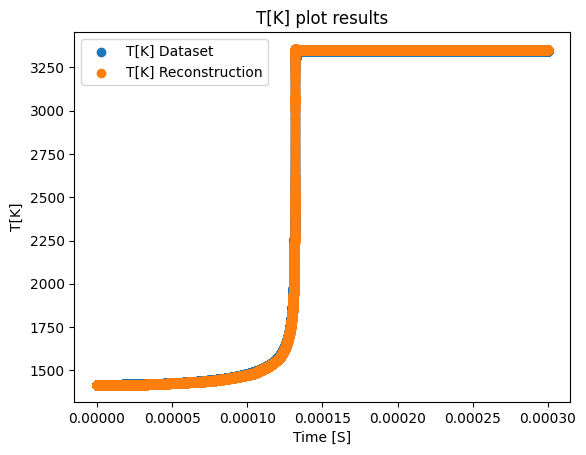

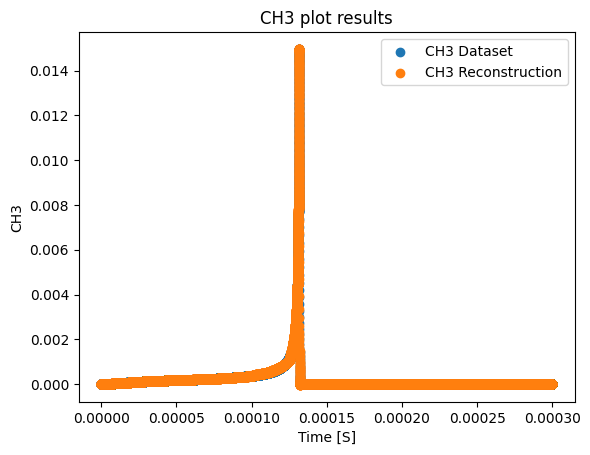

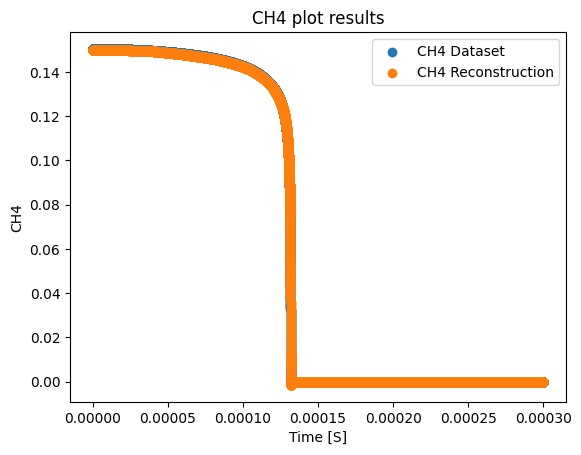

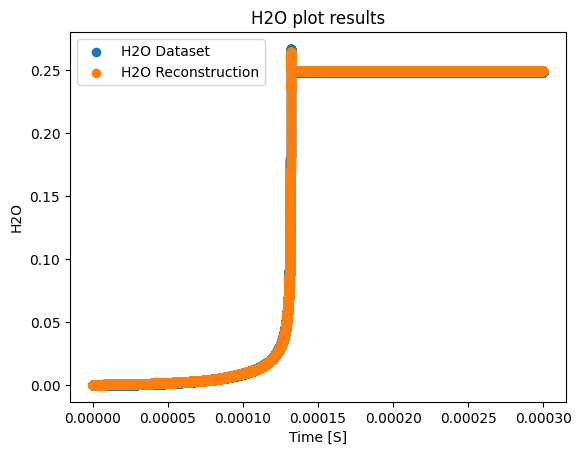

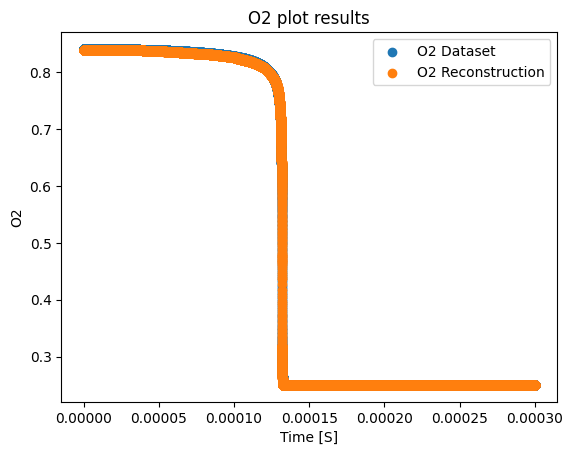

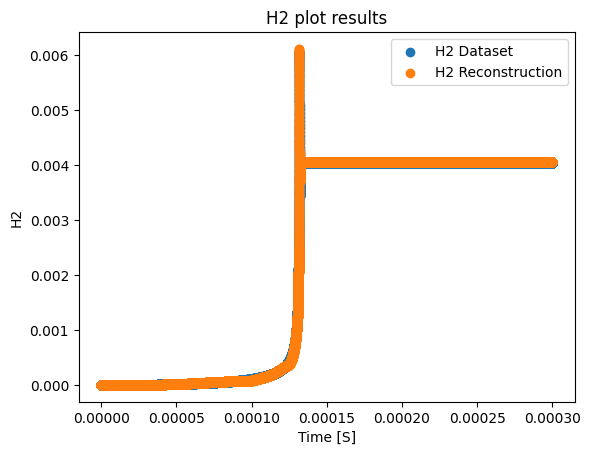

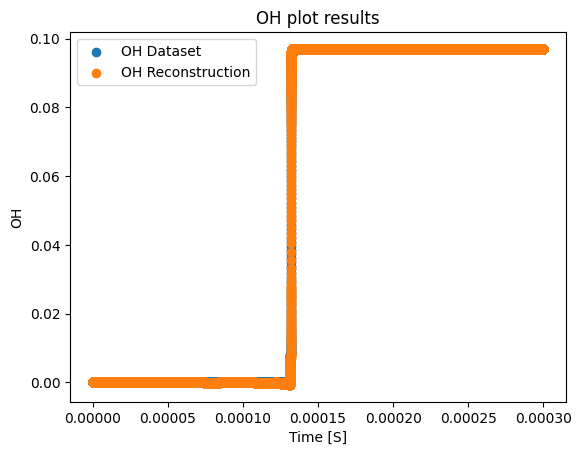

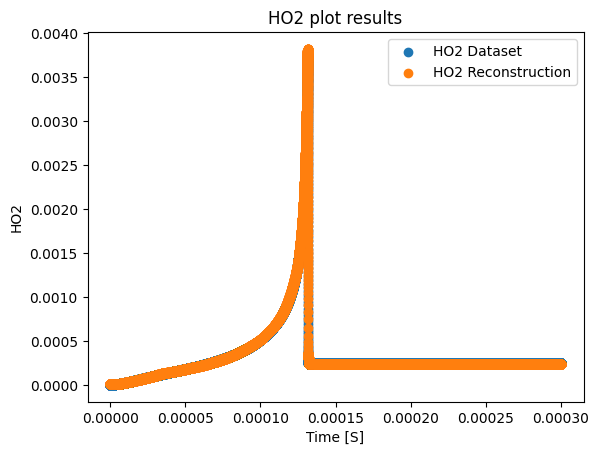

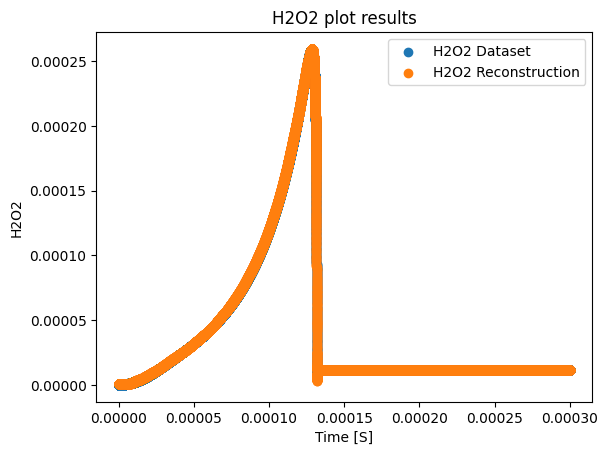

In [9]:
t_index=columns.index('t[s]shift')
t_trans=maximum_values.columns.get_loc('t[s]')
time_plot=(dataset.iloc[:,t_index])*maximum_values.iloc[0,t_trans]
    
for k in range(len(interest_vector)):
    original_index=columns.index(interest_vector[k]+'shift')
    #print(columns[original_index])
    results_index=columns.index(interest_vector[k]) #minues one due to the time column presence 
    #print(columns[results_index])
    #print(results_index-1)
    transformation_index=maximum_values.columns.get_loc(interest_vector[k])
    plot_name=interest_vector[k]+'.png'
    
    input_label=interest_vector[k]+' Dataset'
    output_label=interest_vector[k]+' Reconstruction'
    
    original=(dataset.iloc[:,original_index]).to_numpy()
    #original=original*transformation_values[1,original_index]
    #original=original+transformation_values[0,original_index]
    #original=np.exp(original)-1
    original=original*maximum_values.iloc[0,transformation_index]
    
    output=(results[:,results_index-1])
    #output=output*transformation_values[1,results_index]
    #output=output+transformation_values[0,results_index]
    #output=np.exp(output)-1
    output=output*maximum_values.iloc[0,transformation_index]
    
    plt.figure(k)
    plt.scatter(time_plot,original, label=input_label)
    plt.scatter(time_plot,output, label=output_label)
    plt.title(interest_vector[k]+' plot results')
    plt.xlabel('Time [S]')
    plt.ylabel(interest_vector[k])
    plt.legend()

In [10]:
latent_space=Autoencoder.lat_activation(Autoencoder.encoder(dataset.iloc[:,1:2+n_columns_mass_fraction].to_numpy())).numpy()

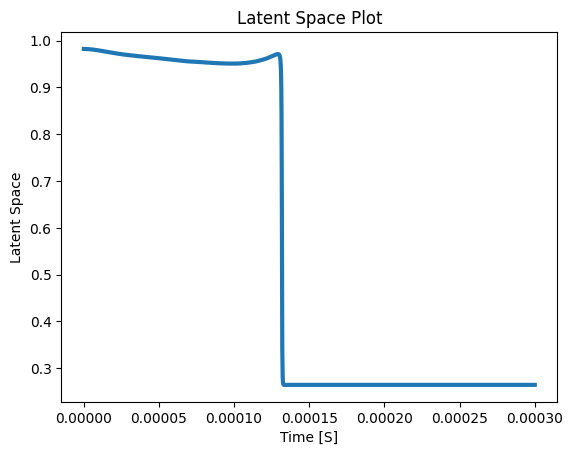

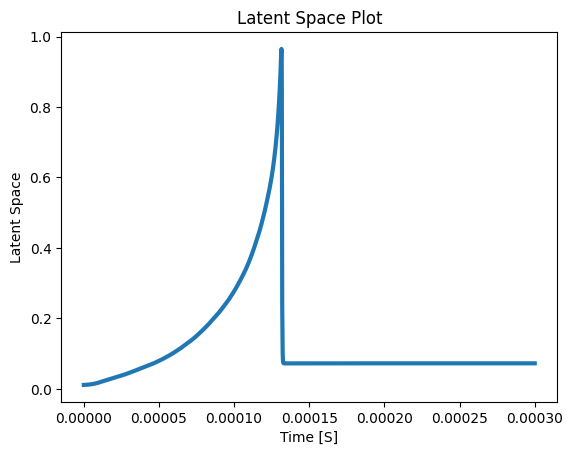

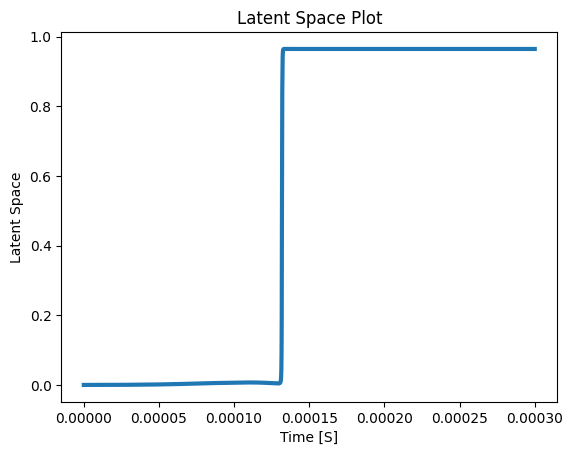

In [11]:
reduced_size=3

if reduced_size==1:
    plt.figure()
    plt.plot(time_plot,latent_space,linewidth=3)
    plt.title('Latent Space Plot')
    plt.xlabel('Time [S]')
    plt.ylabel('Latent Space')
else: 
    for i in range(reduced_size):
            plt.figure(i)
            plt.plot(time_plot,latent_space[:,i],linewidth=3)
            plt.title('Latent Space Plot')
            plt.xlabel('Time [S]')
            plt.ylabel('Latent Space')

In [12]:
corr_dataset=dataset.iloc[:,1:2+n_columns_mass_fraction+n_columns_source]
corr_columns=corr_dataset.columns.to_list()
corr_dataset

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.405009,1.326108e-11,9.541461e-10,2.858210e-11,0.936511,1.600835e-11,1.734509e-13,9.651868e-07,7.981306e-10,8.071002e-36,...,4.999253e-10,2.736158e-29,1.613926e-17,1.215622e-18,1.074986e-08,7.871050e-06,-6.110541e-04,1.282324e-28,9.466670e-29,5.054586e-30
1,0.405009,5.160087e-11,1.829151e-09,1.092913e-10,0.936511,6.208469e-11,1.282274e-12,1.930629e-06,3.190466e-09,3.666835e-34,...,1.925822e-09,4.537490e-28,6.483622e-17,7.682575e-18,2.165883e-08,7.989509e-06,-6.111756e-04,3.673155e-27,2.404399e-27,1.486555e-28
2,0.405009,1.129863e-10,2.631809e-09,2.351217e-10,0.936511,1.354280e-10,4.166864e-12,2.896337e-06,7.176265e-09,2.925805e-33,...,4.175189e-09,2.356644e-27,1.465831e-16,2.288543e-17,3.273380e-08,8.112404e-06,-6.113001e-04,2.601521e-26,1.663305e-26,1.081551e-27
3,0.405009,1.954994e-10,3.368527e-09,3.996552e-10,0.936511,2.333332e-10,9.609355e-12,3.862318e-06,1.275435e-08,1.069607e-32,...,7.154165e-09,7.453729e-27,2.618986e-16,4.943198e-17,4.398005e-08,8.238497e-06,-6.114271e-04,1.032914e-25,6.662611e-26,4.415418e-27
4,0.405009,2.973953e-10,4.045134e-09,5.972098e-10,0.936511,3.532908e-10,1.831248e-11,4.828580e-06,1.992355e-08,-7.047075e-34,...,1.077962e-08,1.833664e-26,4.113100e-16,8.941213e-17,5.540128e-08,8.366688e-06,-6.115561e-04,2.983396e-25,1.954920e-25,1.308870e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119994,0.955486,2.682846e-01,4.433527e-01,9.971928e-01,0.278427,9.664355e-01,7.181703e-01,6.468984e-02,4.413328e-02,3.295155e-07,...,-9.342895e-22,-7.202817e-24,-1.040432e-24,-1.059582e-27,-2.570040e-29,-1.178204e-31,-8.267521e-34,-2.730773e-22,-5.014201e-23,-4.712457e-24
119995,0.955486,2.682846e-01,4.433527e-01,9.971928e-01,0.278427,9.664355e-01,7.181703e-01,6.468984e-02,4.413328e-02,3.295155e-07,...,-7.349763e-22,-7.393404e-24,-1.080033e-24,-1.048753e-27,-2.446680e-29,-1.190828e-31,-7.768589e-34,-2.843146e-22,-4.997883e-23,-4.631364e-24
119996,0.955486,2.682846e-01,4.433527e-01,9.971928e-01,0.278427,9.664355e-01,7.181703e-01,6.468984e-02,4.413328e-02,3.295155e-07,...,-8.256333e-22,-6.194359e-24,-1.100148e-24,-1.030183e-27,-2.537041e-29,-1.222322e-31,-6.863790e-34,-2.594692e-22,-4.902717e-23,-4.542862e-24
119997,0.955486,2.682846e-01,4.433527e-01,9.971928e-01,0.278427,9.664355e-01,7.181703e-01,6.468984e-02,4.413328e-02,3.295155e-07,...,-7.892226e-22,-6.395232e-24,-1.078530e-24,-1.049192e-27,-2.468662e-29,-1.235118e-31,-7.490980e-34,-2.771478e-22,-4.966808e-23,-4.557678e-24


In [13]:
iterations=np.shape(corr_dataset)[1]

from scipy import stats 

if reduced_size==1:
    corr_indexes=np.zeros(iterations) #rows, columns
    corr_indexes=np.array([corr_indexes])
    
    for j in range(iterations):
        corr_indexes[:,j],_=stats.kendalltau(corr_dataset.iloc[:,j],latent_space)
    corr_indexes=pd.DataFrame(corr_indexes, columns=corr_columns)
else: 
    
    corr_indexes=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            corr_indexes[k,j],_=stats.kendalltau(corr_dataset.iloc[:,j],latent_space[:,k])
    corr_indexes=pd.DataFrame(corr_indexes, columns=corr_columns)

In [14]:
corr_indexes

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,-0.705400,-0.755387,-0.757284,-0.757492,0.709352,-0.709409,-0.702759,-0.119907,0.186122,-0.700010,...,0.406920,0.404580,0.408585,0.408802,0.406892,0.429671,-0.057508,0.403721,0.406088,0.407278
1,0.077517,0.029755,0.027851,0.027539,-0.081453,0.081459,0.088031,0.670056,0.597109,0.090768,...,0.353692,0.374451,0.367341,0.367828,0.357795,0.343610,0.283731,0.371530,0.367937,0.369210
2,0.763608,0.801045,0.802938,0.803139,-0.767554,0.767613,0.760971,0.179155,-0.139156,0.758226,...,-0.359817,-0.357014,-0.361011,-0.361228,-0.359320,-0.382063,-0.001961,-0.356155,-0.358518,-0.359707


CH4     0.755139
O2      0.709352
CH3w    0.532189
Ow      0.504411
C2H6    0.484853
Name: 0, dtype: float64
HCCO     0.768954
C2H      0.758461
HO2      0.670056
H2O2     0.597109
CH2CO    0.536737
Name: 1, dtype: float64
O     0.803139
H     0.802938
H2    0.801045
CO    0.796227
OH    0.767613
Name: 2, dtype: float64


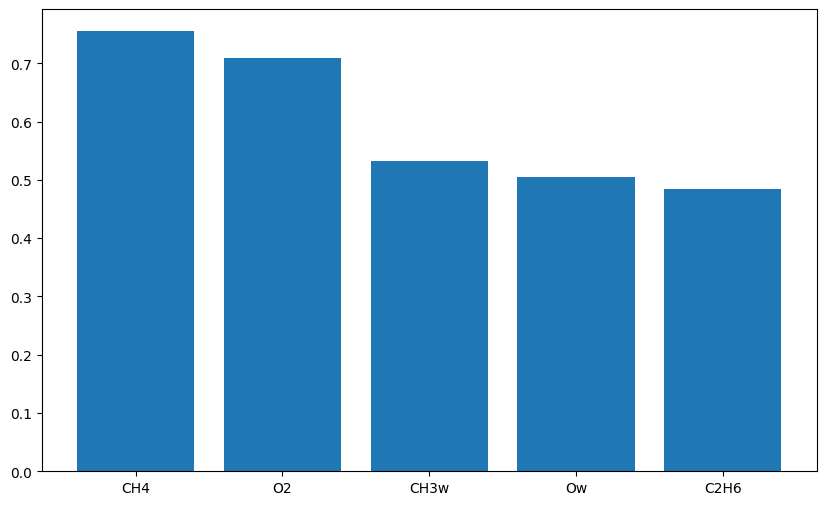

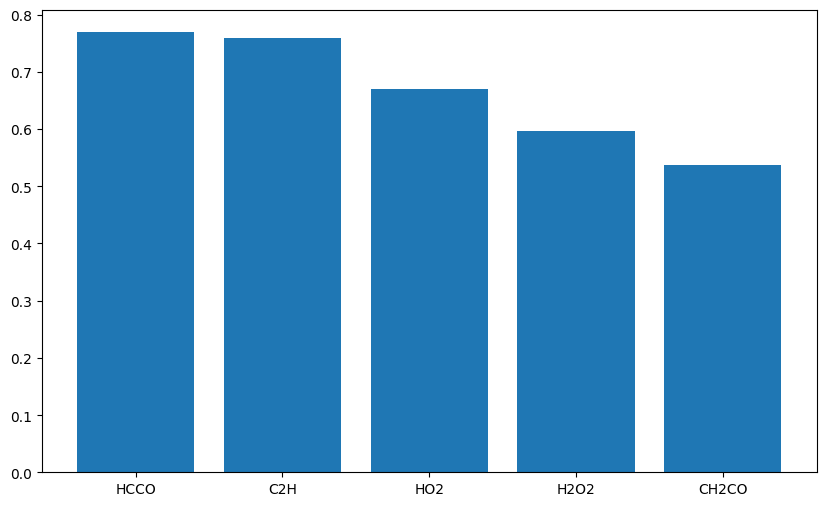

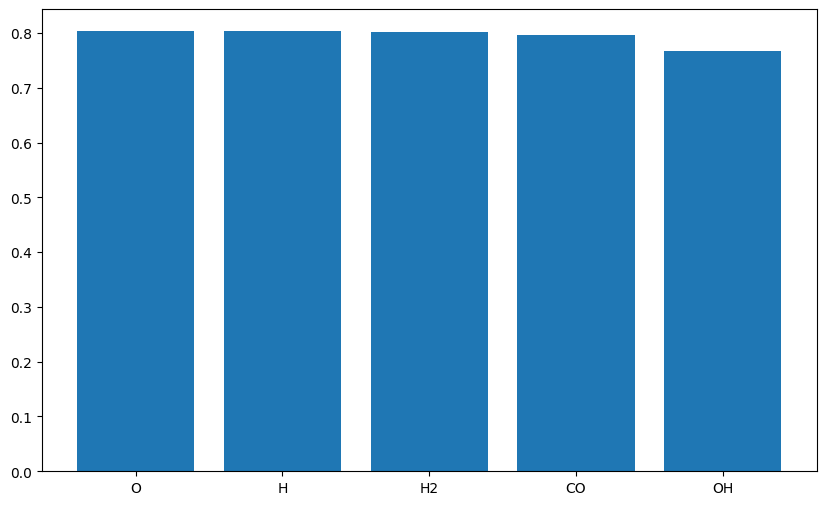

In [15]:
for m in range(reduced_size):
    
    indexes=corr_indexes.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)

In [16]:
if reduced_size==1:
    spearman_indexes=np.zeros(iterations) #rows, columns
    spearman_indexes=np.array([spearman_indexes])
    
    for j in range(iterations):
        spearman_indexes[:,j],_=stats.spearmanr(corr_dataset.iloc[:,j],latent_space)
    spearman_indexes=pd.DataFrame(spearman_indexes, columns=corr_columns)
else: 
    
    spearman_indexes=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            spearman_indexes[k,j],_=stats.spearmanr(corr_dataset.iloc[:,j],latent_space[:,k])
    spearman_indexes=pd.DataFrame(spearman_indexes, columns=corr_columns)

In [17]:
spearman_indexes

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,-0.853046,-0.887704,-0.889177,-0.889415,0.853241,-0.853242,-0.848165,-0.193672,0.295500,-0.846011,...,0.713840,0.705495,0.716436,0.716629,0.714456,0.719300,-0.071470,0.706026,0.712710,0.713430
1,0.034575,-0.002093,-0.005365,-0.005617,-0.034770,0.034770,0.041535,0.770025,0.713056,0.048479,...,0.444127,0.468605,0.462768,0.463340,0.450177,0.450775,0.322905,0.466035,0.463716,0.464628
2,0.878011,0.903394,0.904865,0.905103,-0.878206,0.878205,0.873136,0.244541,-0.278081,0.870984,...,-0.696852,-0.688136,-0.698943,-0.699136,-0.696938,-0.701021,-0.038851,-0.688640,-0.695252,-0.695975


CH4     0.887609
O2      0.853241
Ow      0.765996
CH3w    0.764964
C2H4    0.756701
Name: 0, dtype: float64
HCCO     0.859584
C2H      0.850643
HO2      0.770025
H2O2     0.713056
CH2CO    0.635561
Name: 1, dtype: float64
O      0.905103
H      0.904865
H2     0.903394
CO     0.899772
CO2    0.878206
Name: 2, dtype: float64


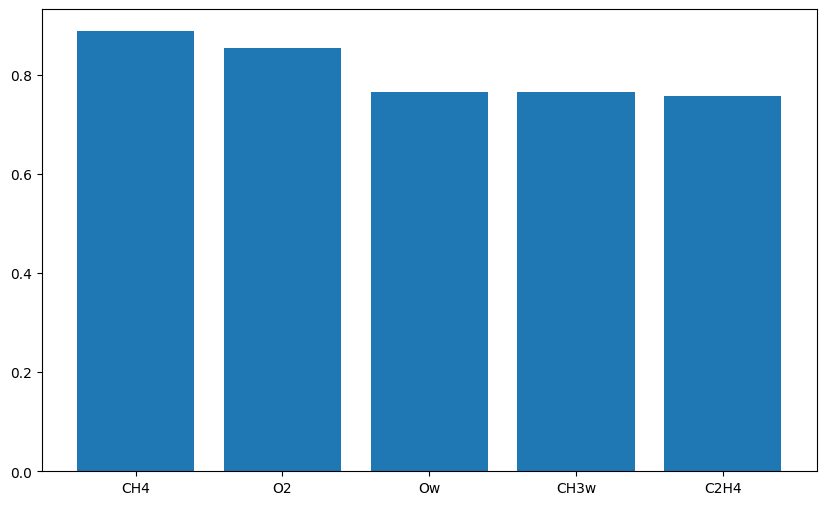

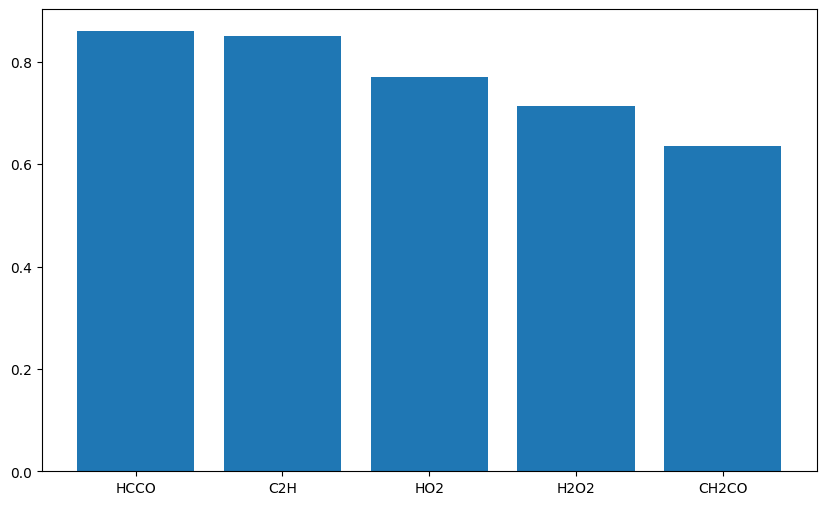

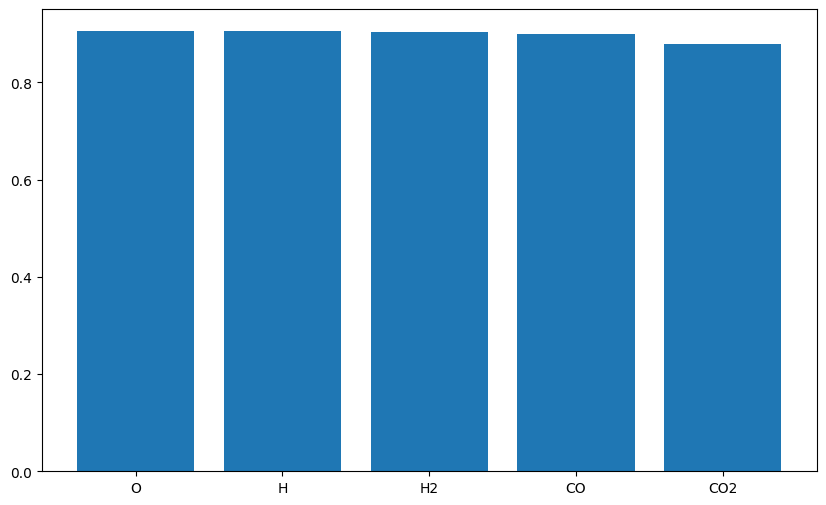

In [18]:
for m in range(reduced_size):
    
    indexes=spearman_indexes.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)

In [19]:
n_samples=np.shape(latent_space)[0]

corr_dataset_=corr_dataset.iloc[1:,:]

latent_space_=latent_space[0:n_samples-1,:]

In [20]:
print(np.shape(corr_dataset_))
print(np.shape(latent_space_))

(119998, 61)
(119998, 3)


In [21]:
iterations=np.shape(corr_dataset_)[1]

from scipy import stats 

if reduced_size==1:
    corr_indexes_=np.zeros(iterations) #rows, columns
    corr_indexes_=np.array([corr_indexes_])
    
    for j in range(iterations):
        corr_indexes_[:,j],_=stats.kendalltau(corr_dataset_.iloc[:,j],latent_space_)
    corr_indexes_=pd.DataFrame(corr_indexes_, columns=corr_columns)
else: 
    
    corr_indexes_=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            corr_indexes_[k,j],_=stats.kendalltau(corr_dataset_.iloc[:,j],latent_space_[:,k])
    corr_indexes_=pd.DataFrame(corr_indexes_, columns=corr_columns)

In [22]:
corr_indexes_

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,-0.705411,-0.755368,-0.757265,-0.757473,0.709361,-0.709417,-0.702767,-0.119904,0.186157,-0.700019,...,0.406926,0.404608,0.408606,0.408823,0.406912,0.429692,-0.057480,0.403748,0.406115,0.407305
1,0.077522,0.029781,0.027877,0.027565,-0.081456,0.081462,0.088034,0.670050,0.597076,0.090771,...,0.353678,0.374431,0.367326,0.367814,0.357781,0.343595,0.283704,0.371509,0.367917,0.369190
2,0.763614,0.801033,0.802926,0.803128,-0.767557,0.767617,0.760975,0.179147,-0.139185,0.758230,...,-0.359830,-0.357034,-0.361025,-0.361241,-0.359333,-0.382076,-0.001983,-0.356175,-0.358538,-0.359726


CH4     0.755119
O2      0.709361
CH3w    0.532206
Ow      0.504404
C2H6    0.484815
Name: 0, dtype: float64
HCCO     0.768915
C2H      0.758422
HO2      0.670050
H2O2     0.597076
CH2CO    0.536692
Name: 1, dtype: float64
O     0.803128
H     0.802926
H2    0.801033
CO    0.796215
OH    0.767617
Name: 2, dtype: float64


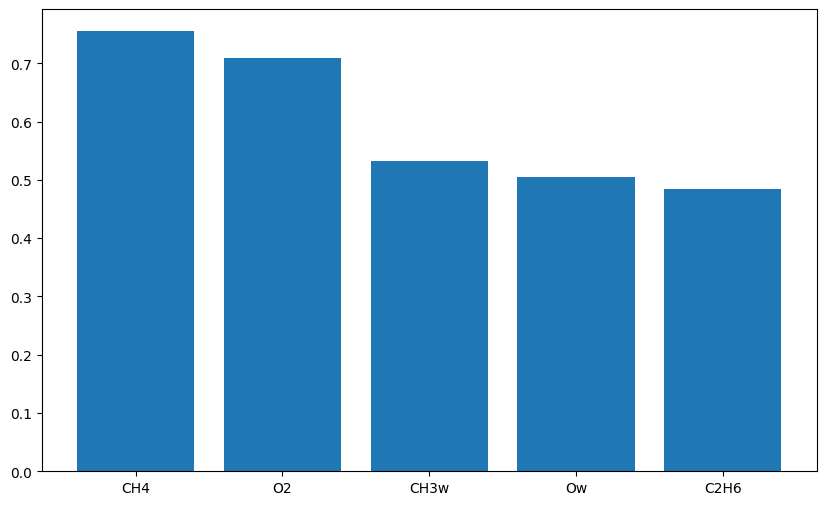

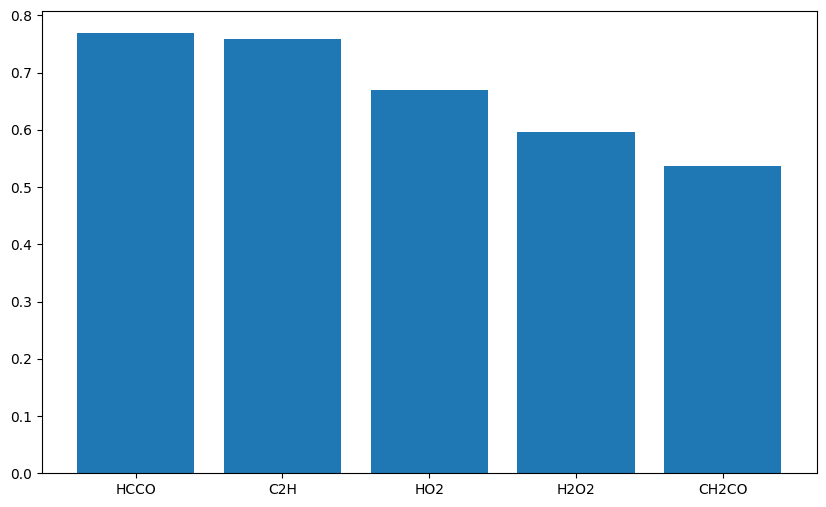

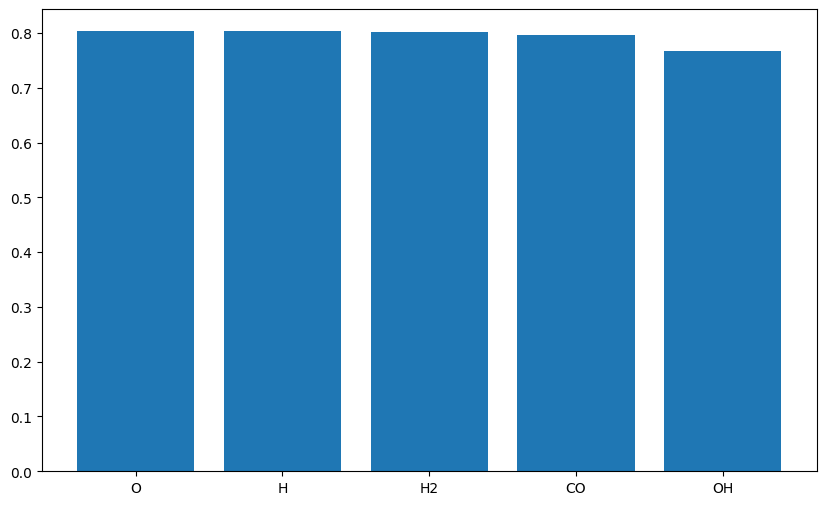

In [23]:
for m in range(reduced_size):
    
    indexes=corr_indexes_.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)